infeasable, run another........................
infeasable, run another........................
infeasable, run another........................
infeasable, run another........................
Optimal status, store results
------------------------ 1 Iteration -----------------------
infeasable, run another........................
Optimal status, store results
------------------------ 2 Iteration -----------------------
Optimal status, store results
------------------------ 3 Iteration -----------------------
Optimal status, store results
------------------------ 4 Iteration -----------------------
infeasable, run another........................
Optimal status, store results
------------------------ 5 Iteration -----------------------
infeasable, run another........................
infeasable, run another........................
Optimal status, store results
------------------------ 6 Iteration -----------------------
Optimal status, store results
------------------------ 7 Iteration ---

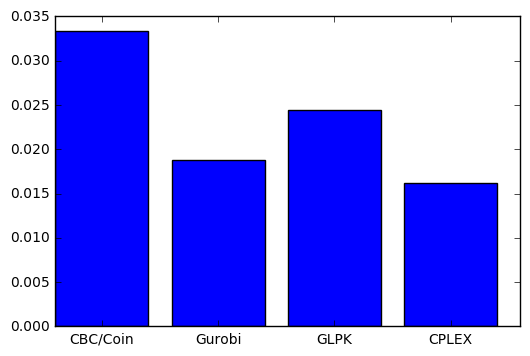

In [2]:
from pulp import *
import time
import numpy as np
from random import randint
import matplotlib.pyplot as matp


#create 30 insances to test
iter = 0
while iter < 30:
    prob = pulp.LpProblem("Transportation Problem", pulp.LpMinimize)

    #Supply locations, X, from 1 to N
    N = 100
    Supply = {}
    for s in range (0,N):
        Supply[s] = randint(1,100)

    #demand locations, Y from 1 to M
    M = 100
    Demand = {}
    for d in range (0,M-1):
        Demand[d] = randint(1,100)

    #Supply_total = sum(Supply.values())
    #Demand_total = sum(Demand.values())

    FIX = sum(Supply.values())-sum(Demand.values())

    if FIX >= 0:
        Demand[M-1] = FIX
    else:
        Demand[M-1] = 0


    #create matrix with arc weights
    ARC = np.random.uniform(1,9,size=(N,M))


    #create ARC connections between supply and demand nodes
    Routes = {}
    Routes = [(n,m) for n in range(0,N) for m in range(0,M)]


    Route_vars = LpVariable.dicts("X",(Routes),0,None,LpInteger)

    for s in Supply:
        prob += lpSum([Route_vars[s,m] for m in Demand]) <= Supply[s]

    for d in Demand:
        prob += lpSum([Route_vars[n,d] for n in Supply]) >= Demand[d]

    #solvers
    name = {1:"GLPK",2:"CPLEX",3:"GUROBI",4:"CBC"}

    #CBC   
    start_time = time.time()
    prob.solve()
    #print name[4]
        #print status
    #print("Status:", LpStatus[prob.status])
    #print time
    CBCtime = {}
    CBCtime[iter] = (time.time() - start_time)
    #print("--- %s seconds ---" % CBCtime)
    # Print out the results
    #for v in prob.variables():
    #    print v.name, "=", v.varValue
    #i need to determine feasable or not and filter results
    CBC_Status = LpStatus[prob.status]
    #print (CBC_Status)
    #print "-----------break-----------"

    #GUROBI
    start_time = time.time()
    prob.solve(GUROBI(msg=0))
    #print name[3]
    #print status
    #print("Status:", LpStatus[prob.status])
    #print time
    GUROBItime = {}
    GUROBItime[iter] = (time.time() - start_time)
    #print("--- %s seconds ---" % GUROBItime)
    # Print out the results
    #for v in prob.variables():
    #    print v.name, "=", v.varValue
    #print "-----------break-----------"

    #GLPK
    start_time = time.time()
    prob.solve(GLPK(msg=0))
    #print name[1]
    #print status
    #print("Status:", LpStatus[prob.status])
    #print time
    GLPKtime = {}
    GLPKtime[iter] = (time.time() - start_time)
    #print("--- %s seconds ---" % GLPKtime)
    # Print out the results
    #for v in prob.variables():
    #    print v.name, "=", v.varValue
    #print "-----------break-----------"


    start_time = time.time()
    prob.solve(CPLEX(msg=0))
    #print name[2]
    #print status
    #print("Status:", LpStatus[prob.status])
    #print time
    CPLEXtime = {}
    CPLEXtime[iter] = (time.time() - start_time)
    #print("--- %s seconds ---" % CPLEXtime)
    # Print out the results
    #for v in prob.variables():
    #print v.name, "=", v.varValue
    #print "-----------break-----------"

    if CBC_Status == "Optimal":
        print "Optimal status, store results"
        iter = iter + 1
        print("------------------------ %s Iteration -----------------------" % iter)
    else:
        print "infeasable, run another........................"

#graph average result of 30 successful trials
CBC_Graph = (sum(CBCtime.values())/30)  
Gurobi_Graph = (sum(GUROBItime.values())/30) 
GLPK_Graph = (sum(GLPKtime.values())/30) 
CPLEX_Graph = (sum(CPLEXtime.values())/30)
Times = (CBC_Graph, Gurobi_Graph, GLPK_Graph, CPLEX_Graph)
Index = np.arange(4)

matp.bar(Index, Times)
matp.xticks(Index+.4, ("CBC/Coin", "Gurobi", "GLPK", "CPLEX"))
matp.show()